<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Fare標準範圍: 
 count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
Q1 answer: 大多數票價介於0~50之間但最大值顯示為512.331,

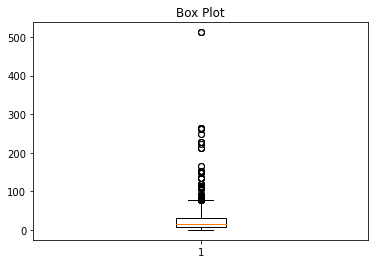

Q2 answer: 由於在船上有分不同艙等,因此票價為200多的仍可能屬正常票價只是因為艙等較高而相對數量較少,至於三筆超過500的票價則可能是輸入錯誤,可先分群出不同艙等後再做調整或刪除此筆資料


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn  as sns
from scipy import stats
import math
import statistics
#讓圖可以在 jupyter notebook顯示
%matplotlib inline
    
print(df_train.info())
df_train = pd.read_csv("Titanic_train.csv")
#Q1：觀察票價是否有異常值的現象？
#方法一
print("\nFare標準範圍: \n", df_train['Fare'].describe())
print("Q1 answer: 大多數票價介於0~50之間但最大值顯示為512.331, 表示可能有輸入錯誤造成的異常值")

#方法二 - 三倍標準差
def outliers_z_score(ys,times):
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > times)
out_index=outliers_z_score(df_train['Fare'],3)
print("Q1 answer: 大多數票價介於0~50之間但以下的表中大於200的值為",df_train.loc[out_index[0],'Fare'],", 表示可能有輸入錯誤造成的異常值")

#方法三 - IQR method
def outliers_iqr(ys,times):
    #注意 使用 np.percentile 要去除 nan 要不然計算出來會錯誤，所以我們採用下者的程式 np.nanpercentile
    #quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    quartile_1, quartile_3 = np.nanpercentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * times)
    upper_bound = quartile_3 + (iqr * times)
    return np.where((ys > upper_bound) | (ys < lower_bound))
out_index2=outliers_iqr(df_train['Fare'],7)
print("Q1 answer: 在7倍IQR下票價超出範圍的為下表所列",df_train.loc[out_index2[0],'Fare'])

plt.boxplot(df_train['Fare'][~np.isnan(df_train['Fare'])],whis=2)    #作圖
plt.title('Box Plot')
plt.show()

#Q2：你覺得找出的異常需要做處理嗎？
print("Q2 answer: 由於在船上有分不同艙等,因此票價為200多的仍可能屬正常票價只是因為艙等較高而相對數量較少,至於三筆超過500的票價則可能是輸入錯誤,可先分群出不同艙等後再做調整或刪除此筆資料")